# Chapter 10 - Conjugate gradient methods

In this chapter, we will demonstrate how to solve $Ax = b$, when A is symmetric, positive definite

We define $\mathbf{g}^k = \nabla f(\mathbf{x}^k)$, and choose some starting point $\mathbf{x}^k$. Then, the algorithm reads

1. Set k := 0.
2. IF $\mathbf{g}^k = \mathbf{0}$ THEN STOP; ELSE set $\mathbf{d}^0 = -\mathbf{g}^k$.
3. $\begin{equation} \alpha_k = - \frac{(\mathbf{g}^k)^T\mathbf{d}^k}{(\mathbf{d}^k)^TQ\mathbf{d}^k}.\end{equation}$
4. $x^{k+1} = x^k + \alpha_k\mathbf{d}^k$.
5. IF $\mathbf{g}^{k+1} = \mathbf{0}$ THEN STOP.
6. $\begin{equation} \beta_k = \frac{(\mathbf{g}^{k+1})^TQ\mathbf{d}^k}{\mathbf{d}^kQ\mathbf{d}^k}.\end{equation}$
7. $\mathbf{d}^{k+1} = -\mathbf{g}^{k+1}+\beta_k\mathbf{d}^k$.
8. Set k := k + 1. GO to step 3.

In [1]:
#import required libraries and functions

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# You need to implement the gradientMethods.cg - function yourselves
from gradientMethods.cg import minimize as cG_minimize

## Example from class

We will start by solving a simple 3x3 problem. This is done in order to check that your algorithms are correct

In [2]:
A = np.array([[3, 0, 1],
              [0, 4, 2],
              [1, 2, 3]])
b = np.array([3, 0, 1])

We can first compute the solution using numpy for comparison with CG:

In [3]:
np.linalg.solve(A,b)

array([1., 0., 0.])

In [4]:
x, k = cG_minimize(A, b, x_init=np.array([0,0,0]), TOL=10e-10, MAX_ITER=3)

In [5]:
print('The computed solution is:', x, '.')

The computed solution is: [ 1.00000000e+00 -2.77555756e-17  2.77555756e-17] .


## Partial differential equation

In this section, we will solve the elliptic partial differential equation (PDE)
$$
\begin{eqnarray}
    -\Delta u + u &=& f, \quad x \in \Omega = (0,1) \times (0,1), \\
    \frac{\partial u}{\partial n} &=& 0, \quad x \in \partial\Omega.
\end{eqnarray}
$$
The discretization of this PDE is not in the syllabus of this course (but is part of the curriculum of MATH250). Consequently, we will be given matrices $A$ and $M$, and solve the associated discrete system
$$
\begin{equation}
A\mathbf{u} = M\mathbf{f} := \mathbf{b},
\end{equation}
$$
where (again, outside the scope of this course), the matrix A is known to be symmetric, positive definite, and consequently, the linear system above is eligible for the conjugate gradient algorithm.

### Loading matrices

The matrices $A$ and $M$ are already computed, and we can load them into the notebook. Also, we are going to need the coordinate map for plotting purposes (you need not to worry about this here).

The matrices $A$ and $M$ will be of size $1089 \times 1089$, meaning that we discretize $\Omega$ using 1089 grid points.

In [6]:
A = np.load('./matrices/A.npy')
M = np.load('./matrices/M.npy')

coords = np.load('./matrices/coords.npy')

### Help functions

We need two help functions:
1. A function which computes a right-hand side $f$. Feel free to change this if you want to solve for a different $f$.
2. A function which reshapes the solution for plotting purposes.

In [7]:
def f(coords):
    return np.exp(-(coords[:,0]-.5)**2-(coords[:,1]-.5)**2)

def reshape_soln(u, coords):
    u_2d = np.zeros((33,33))
    for i in range(len(u)):
        xi = int(coords[i,0] * 32)
        yi = int(coords[i,1] * 32)
        u_2d[xi,yi] = u[i]
    return u_2d

In [8]:
#Compute b = M*f
b = M.dot(f(coords))

In [9]:
# Solve the linear system using CG method
u, k = cG_minimize(A, b)

In [10]:
# Solve the linear system using the direct method
u_exact = np.linalg.solve(A, b)

In [11]:
# Compare solutions
print('The relative difference between the solutions is:', np.linalg.norm(u-u_exact) / np.linalg.norm(u_exact), 
      ', where the cG solution was found using', k, 'iterations.')

The relative difference between the solutions is: 7.241530427116344e-07 , where the cG solution was found using 73 iterations.


Notice how few out of the potential maximal 1089 iterations we needed to solve the problem to such an high accuracy. In practice, we would also have applied a preconditioner to the problem to reduce the iteration count much further. This is also done to handle a growth in iteration numbers when the mesh size $h$ is reduced

### Plotting

In [12]:
x = np.linspace(0,1,33)
y = np.linspace(0,1,33)
X, Y = np.meshgrid(x,y)

In [13]:
u_2d = reshape_soln(u, coords)

<IPython.core.display.Javascript object>


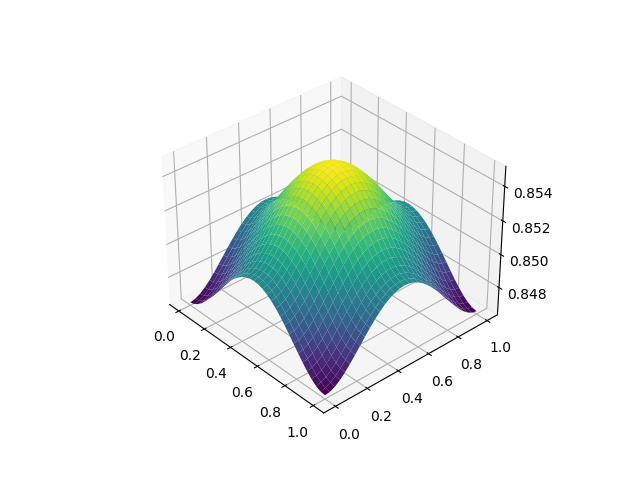

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, u_2d, cmap='viridis', edgecolor='none')